<a href="https://colab.research.google.com/github/Ash100/Environment/blob/main/DataScience_Project_on_Environmental_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Complete DataScience Project For Environmental Data**

This project is prepared by **Dr. Ashfaq Ahmad**. I have used Air Quality Data of Islamabad City collected for the Year (2019-2023)

## **Exploratory Data Analysis - (EDA)**

In [54]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading the dataset (Replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/content/final_data.csv')

In [ ]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

In [ ]:
# Basic information about the dataset
print("\nBasic info of the dataset:")
df.info()

In [ ]:
# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

In [ ]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

In [12]:
# Handling Date Parsing: Attempt to convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d-%b')  # Example format '01-Aug'

In [ ]:
# Check for any rows where the date could not be converted (NaT values)
invalid_dates = df[df['Date'].isnull()]
print(f"\nRows with invalid date format (NaT):\n{invalid_dates}")

In [14]:
# Dropping rows with invalid Date, if any
df.dropna(subset=['Date'], inplace=True)

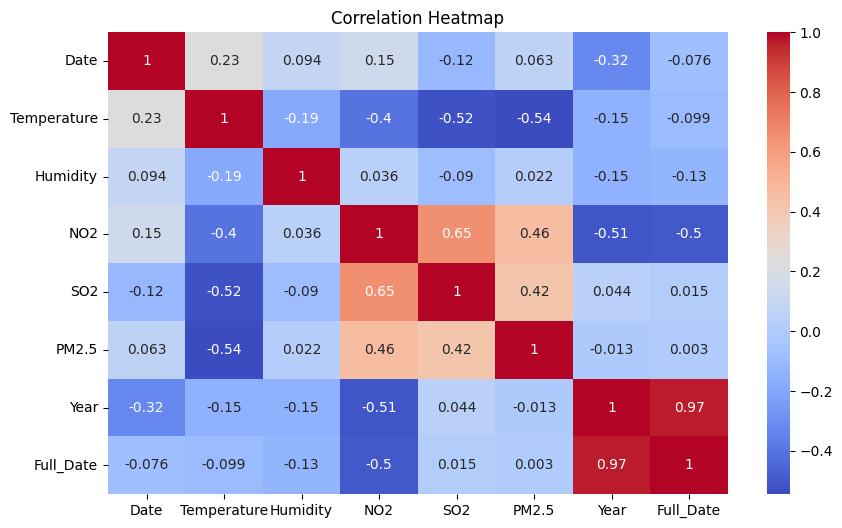

In [55]:
# 1. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# 2. Distribution of numerical features
num_features = ['Temperature', 'Humidity', 'NO2', 'SO2', 'PM2.5']

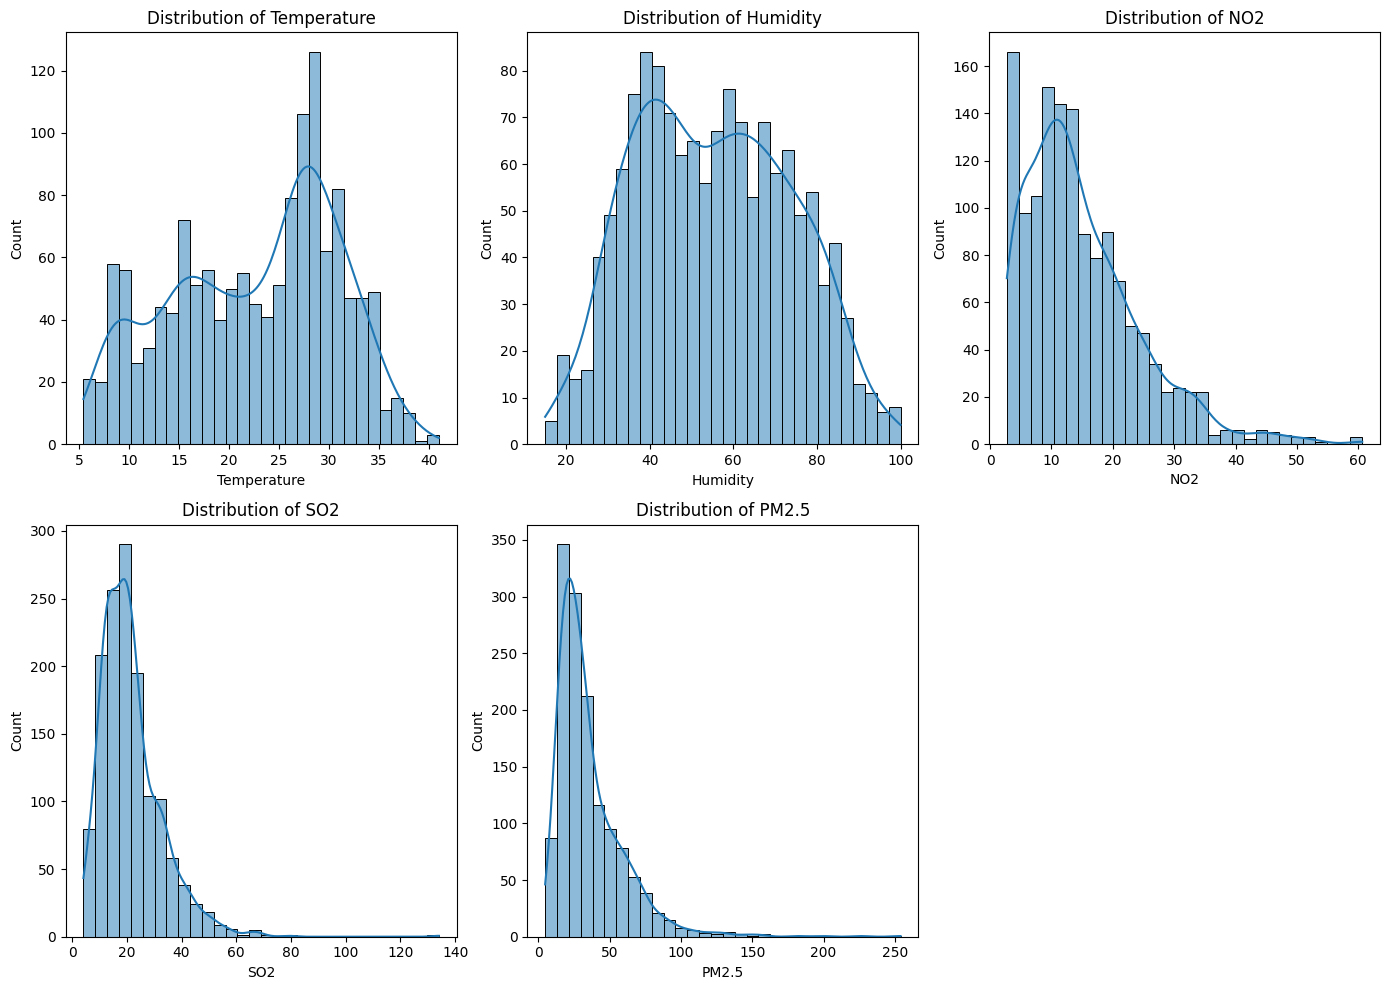

In [56]:
plt.figure(figsize=(14,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()

# Save the figure
plt.savefig('Data_Distribution.png')  # Save the figure as a PNG file
plt.show()
plt.show()

In [39]:
# Ensure the Date column is properly formatted and combine with Year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d-%b')  # Adjust format to match your date format
df['Year'] = df['Year'].astype(str)  # Ensure Year is a string for concatenation




In [36]:
# Combine Date and Year into a single datetime column
df['Full_Date'] = pd.to_datetime(df['Year'] + '-' + df['Date'].dt.strftime('%m-%d'), errors='coerce')

In [37]:
# Dropping rows where Full_Date is NaT (not a valid date)
df.dropna(subset=['Full_Date'], inplace=True)

In [40]:
# Exclude non-numeric columns (like 'Year')
df_numeric = df.drop(columns=['Year', 'Date'])

In [42]:
# Resample data by month and calculate mean for each month
df_monthly = df_numeric.resample('M', on='Full_Date').mean()

In [ ]:
# --------------- Time Series Trends (Yearly and Monthly Combined) ---------------
plt.figure(figsize=(10,6))
for feature in ['PM2.5', 'NO2', 'SO2', 'Temperature', 'Humidity']:
    plt.plot(df_monthly.index, df_monthly[feature], label=feature)
plt.xlabel('Date (Monthly)')
plt.ylabel('Concentration / Values')
plt.title('Time Series Plot of PM2.5, NO2, SO2, Temperature, and Humidity (Monthly Averages)')
plt.legend()
# Save the figure
plt.savefig('Time_Series_Trend.png')  # Save the figure as a PNG file
plt.show()
plt.show()

In [ ]:
# 4. Scatter plots of pollutants vs. meteorological conditions
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Temperature', y='PM2.5', data=df)
plt.title("Temperature vs PM2.5")
# Save the figure
plt.savefig('Tmp_Vs_PM2.5.png')  # Save the figure as a PNG file
plt.show()

In [ ]:
# 4. Scatter plots of pollutants vs. meteorological conditions with color based on humidity
plt.figure(figsize=(14,8))

# Temperature vs PM2.5 with color indicating humidity levels
scatter = sns.scatterplot(x='Temperature', y='PM2.5', data=df, hue='Humidity', palette='coolwarm', size='Humidity', sizes=(20, 200))

# Adding the color bar using the scatter plot's collections
norm = plt.Normalize(df['Humidity'].min(), df['Humidity'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Empty array for compatibility
plt.colorbar(sm, label='Humidity')  # Add color bar for humidity

plt.title("Temperature vs PM2.5 (Colored by Humidity)")
plt.tight_layout()
# Save the figure
plt.savefig('Temp_Vs_PM2.5_Hue_Humidity.png')  # Save the figure as a PNG file
plt.show()

In [ ]:
plt.subplot(1,2,2)
sns.scatterplot(x='Humidity', y='PM2.5', data=df)
plt.title("Humidity vs PM2.5")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Box plots to identify outliers
plt.figure(figsize=(14,8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature].dropna(), color='skyblue')
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
# Save the figure
plt.savefig('Data_outlier.png')  # Save the figure as a PNG file
plt.show()


In [ ]:
# 6. Line plot to see the trend over the years
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='PM2.5', data=df)
plt.title("PM2.5 levels over the years")
# Save the figure
plt.savefig('Yearwise_trend.png')  # Save the figure as a PNG file
plt.show()

In [ ]:
# 7. Pairplot to see pairwise relationships
sns.pairplot(df[num_features])
# Save the figure
plt.savefig('features_detail.png')  # Save the figure as a PNG file
plt.show()

# **2. Feature Importance**

In [ ]:
# Exclude Year, Date, and Full_Date from the feature list
features_to_exclude = ['Year', 'Date', 'Full_Date']
X = df.drop(columns=['Temperature'] + features_to_exclude)  # Features (excluding the target variable and unwanted columns)
y = df['Temperature']  # Target variable

# Correlation Analysis
correlation_matrix = df.drop(columns=features_to_exclude + ['Temperature']).corr()  # Exclude unwanted columns

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [81]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate RMSE and other metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

RMSE: 4.60
MAE: 3.37


In [ ]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

## **Model Optimization or Search for the better model or Grid Search**

In [83]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print RMSE for the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized RMSE: {rmse:.2f}")

Optimized RMSE: 4.67


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature_Importance_Random_Forest.png')  # Save the figure as a PNG file
plt.show()

# Display the DataFrame
print(feature_importance_df)

** Linear Regression**

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Using only a few features for simplicity
X_simple = df[['PM2.5', 'Humidity', 'NO2', 'SO2']]  # Replace with your selected features
y_simple = df['Temperature']

# Cross-validation
lin_model = LinearRegression()
scores = cross_val_score(lin_model, X_simple, y_simple, cv=5, scoring='neg_mean_squared_error')
baseline_rmse = np.sqrt(-scores.mean())
print(f"Baseline Linear Regression RMSE: {baseline_rmse:.2f}")

Baseline Linear Regression RMSE: 6.45


In [ ]:
# Fit the linear model
lin_model.fit(X_simple, y_simple)

# Get the coefficients and feature names
coefficients = lin_model.coef_
features = X_simple.columns

# Create a DataFrame for feature importance
linear_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=linear_importance_df)
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--')  # Line at zero for reference
plt.savefig('Feature_Importance_Linear Regression.png')  # Save the figure as a PNG file
plt.show()

# Display the DataFrame
print(linear_importance_df)

**Let's try another Model - gradient boosting**

In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_search = RandomizedSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42),
                                param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error')
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_

# Predictions and RMSE calculation
y_pred_xgb = best_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"Optimized XGBoost RMSE: {rmse_xgb:.2f}")

Optimized XGBoost RMSE: 4.81


In [ ]:
# Get feature importances from the best XGBoost model
xgb_importances = best_xgb.feature_importances_

# Create a DataFrame for feature importance
xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature_Importance_XGB.png')  # Save the figure as a PNG file
plt.show()

# Display the DataFrame
print(xgb_importance_df)

## **3. Classification Task**
We could frame our problem as a classification task, for example:

**Classifying pollution levels:** Define thresholds for pollutants (e.g., "low", "medium", "high") and predict the air quality category based on the input features.

**Anomaly Detection:** Use classification models to detect unusual spikes in pollutants (outliers).

Here, we will Label the SO2 column to Low, medium, and high.

LOW = < 15

MEDIUM = > 15 < 40

HIGH = > 40

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and SO2 is a numeric column
def label_so2(value):
    if value < 16:
        return 'Low'
    elif 15 < value <= 40:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['SO2_Label'] = df['SO2'].apply(label_so2)

# Check the new column
print(df[['SO2', 'SO2_Label']].head())

In [ ]:
# Prepare your data
X = df.drop(columns=['SO2_Label', 'Date', 'Full_Date', 'Year'])  # Exclude unwanted columns
y = df['SO2_Label']  # Use the new label as your target variable

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance (if needed)
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
sns.countplot(x='SO2_Label', data=df)
plt.title('Distribution of SO2 Labels')
plt.savefig('Distribution_of_SO2.png')  # Save the figure as a PNG file
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SO2_Label', y='Temperature', data=df)
plt.title('Temperature by SO2 Label')
plt.savefig('tempVsSo2.png')  # Save the figure as a PNG file
plt.show()

In [ ]:
sns.pairplot(df, hue='SO2_Label')
plt.savefig('SO2_label_vs_others.png')  # Save the figure as a PNG file
plt.show()

**Congratulations!** Today you have learned something new atleast